In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [4]:
sns.set_style('whitegrid')

In [5]:
df = pd.read_csv('tmdb_5000_movies.csv')

In [6]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [9]:
df = df.dropna(subset=['vote_average', 'revenue'])

In [8]:
df = df[df['revenue'] > 0]


In [10]:
def get_first_genre(genre_str):
    try:
        genres = json.loads(genre_str.replace("'", '"'))
        return genres[0]['name'] if genres else 'Unknown'
    except:
        return 'Unknown'
df['primary_genre'] = df['genres'].apply(get_first_genre)

# Filter for movies after 2000
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df = df[df['release_date'].dt.year >= 2000]

# Verify cleaned data
print(f"Dataset size: {df.shape[0]} rows")
print(df[['title', 'vote_average', 'primary_genre', 'revenue']].head())


Dataset size: 2401 rows
                                      title  vote_average primary_genre  \
0                                    Avatar           7.2        Action   
1  Pirates of the Caribbean: At World's End           6.9     Adventure   
2                                   Spectre           6.3        Action   
3                     The Dark Knight Rises           7.6        Action   
4                               John Carter           6.1        Action   

      revenue  
0  2787965087  
1   961000000  
2   880674609  
3  1084939099  
4   284139100  


In [11]:
df = df[df['genres'].str.len() > 2]

C:\Users\chand\AppData\Local\Temp\ipykernel_6128\1528957855.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_ratings.values, y=genre_ratings.index, palette='viridis')


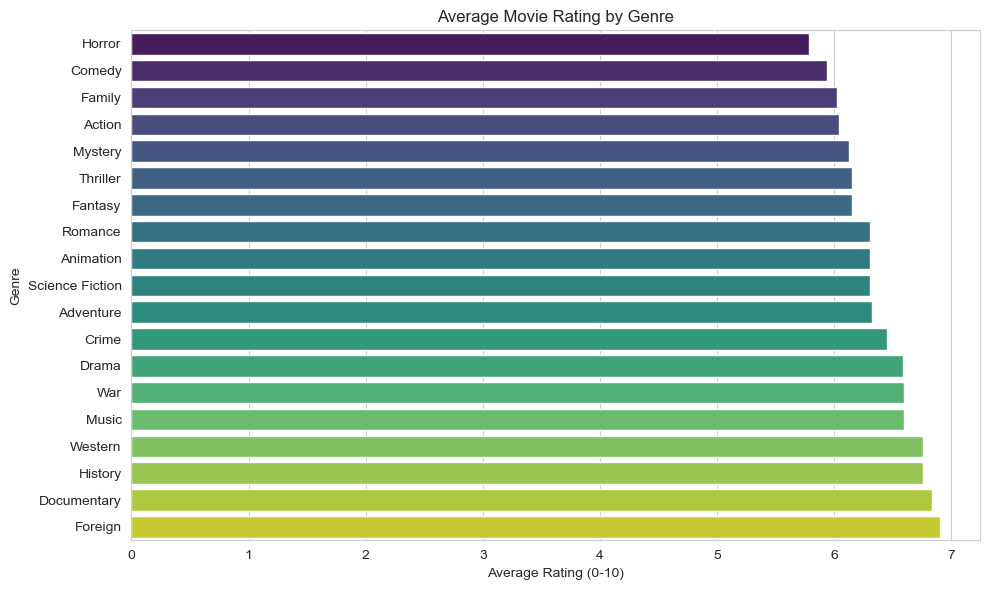

In [12]:
# Cell 4: Bar Chart - Average rating by genre
genre_ratings = df.groupby('primary_genre')['vote_average'].mean().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_ratings.values, y=genre_ratings.index, palette='viridis')
plt.title('Average Movie Rating by Genre')
plt.xlabel('Average Rating (0-10)')
plt.ylabel('Genre')
plt.tight_layout()
plt.savefig('bar_chart.png')
plt.show()

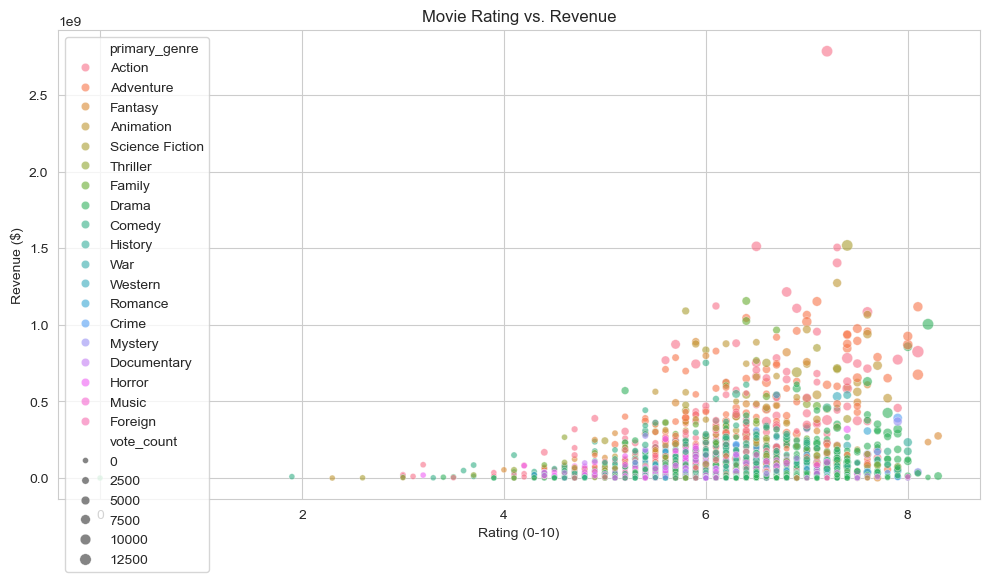

In [13]:
# Cell 5: Scatter Plot - Rating vs. Revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vote_average', y='revenue', data=df, hue='primary_genre', size='vote_count', alpha=0.6)
plt.title('Movie Rating vs. Revenue')
plt.xlabel('Rating (0-10)')
plt.ylabel('Revenue ($)')
plt.tight_layout()
plt.savefig('scatter_plot.png')
plt.show()

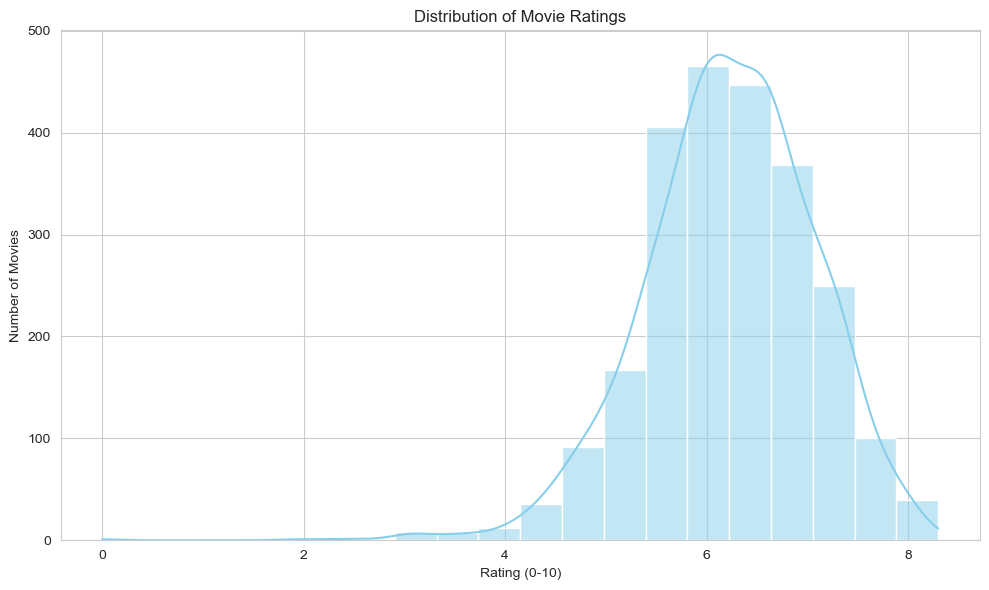

In [14]:
# Cell 6: Histogram - Distribution of movie ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['vote_average'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating (0-10)')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.savefig('histogram.png')
plt.show()